<a href="https://colab.research.google.com/github/Taghreed-Alzahrani/Text-Analysis/blob/main/Yelp_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding the data

In [2]:
# Import the necessary module to mount Google Drive
from google.colab import drive

# Mount the Google Drive and force remount if necessary
drive.mount('/content/drive', force_remount=True)

# Import the os module for interacting with the operating system
import os

# Change the directory path to where the 'Data' folder is saved in your Google Drive
path = '/content/drive/My Drive/Text Analysis'
os.chdir(path)

# Import the required libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Mounted at /content/drive


In [3]:
# Import the WordCloud module for creating word clouds
from wordcloud import WordCloud

# Import necessary NLTK modules for text processing
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources if not already present
nltk.download('punkt')
nltk.download('stopwords')

# Set the list of stopwords from NLTK corpus
stop_words = stopwords.words()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
train_data= pd.read_csv('train.csv.zip',header=None)
train_data.head()

,0,1
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


In [5]:
test_data= pd.read_csv('test.csv.zip',header=None)
test_data.head()

,0,1
0,2,"Contrary to other reviews, I have zero complai..."
1,1,Last summer I had an appointment to get new ti...
2,2,"Friendly staff, same starbucks fair you get an..."
3,1,The food is good. Unfortunately the service is...
4,2,Even when we didn't have a car Filene's Baseme...


In [6]:
train_data.info()
print('_______________________________')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560000 entries, 0 to 559999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       560000 non-null  int64 
 1   1       560000 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.5+ MB
_______________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       38000 non-null  int64 
 1   1       38000 non-null  object
dtypes: int64(1), object(1)
memory usage: 593.9+ KB


In [7]:
# Display the transpose of the describe() method for the DataFrame
print(train_data.describe().T)
print('\n')
print(test_data.describe().T)

      count  mean  std  min  25%  50%  75%  max
0  560000.0   1.5  0.5  1.0  1.0  1.5  2.0  2.0


     count  mean       std  min  25%  50%  75%  max
0  38000.0   1.5  0.500007  1.0  1.0  1.5  2.0  2.0


In [8]:
print(train_data.columns)
print('_______________________________')
print(test_data.columns)
print("\nMV Train:", train_data.isnull().sum())
print("MV Test:", test_data.isnull().sum())

Index([0, 1], dtype='int64')
_______________________________
Index([0, 1], dtype='int64')

MV Train: 0    0
1    0
dtype: int64
MV Test: 0    0
1    0
dtype: int64


# EDA and DATA PREPROCESSING:

# EDA:


<Axes: >

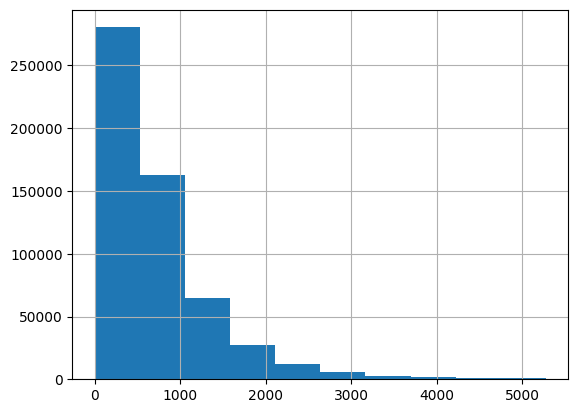

In [9]:
# Access the second column of the train_data DataFrame and calculate the length of each string
# Then, create a histogram of the string lengths
train_data.iloc[:, 1].str.len().hist()

<Axes: >

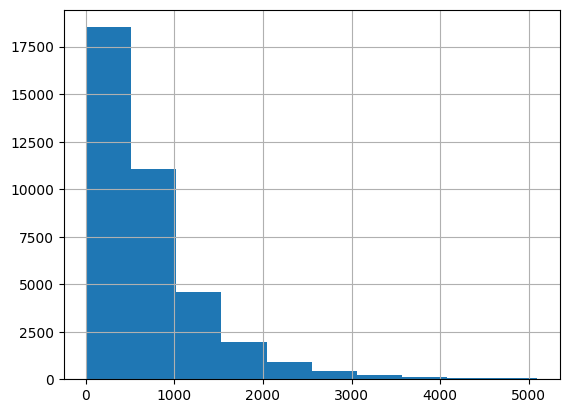

In [10]:
test_data.iloc[:, 1].str.len().hist()

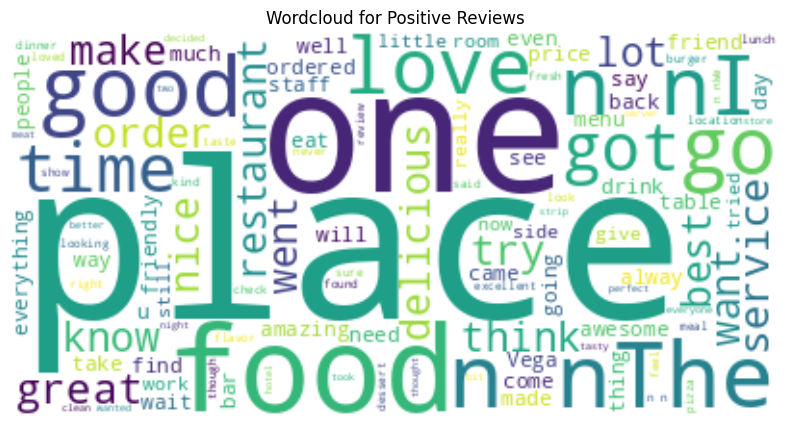

In [14]:
# Concatenate all reviews from the second column of the test_data DataFrame into a single text string
text = " ".join(train_data[train_data[0] == 2][1])

# Create a WordCloud object with a white background color and generate the word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated word cloud image
plt.figure(figsize=(10, 5))  # Set the figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud image
plt.axis("off")  # Turn off the axis
plt.title('Wordcloud for Positive Reviews')  # Set the title of the plot
plt.show()  # Show the plot

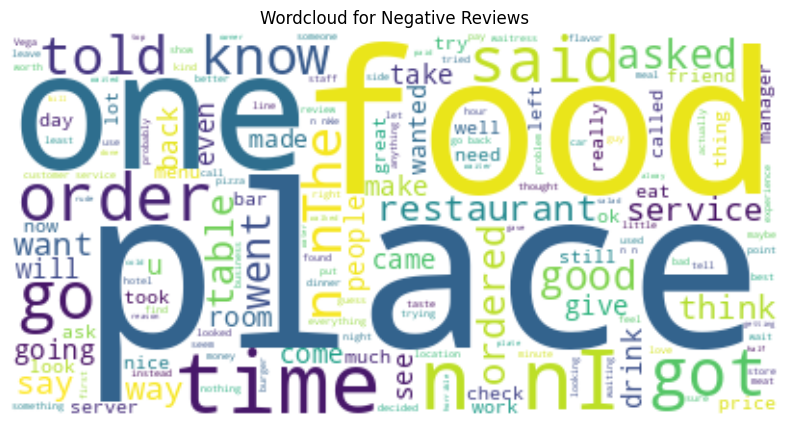

In [15]:
text = " ".join(train_data[train_data[0] == 1][1])

# Create and generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for Negative Reviews')
plt.show()

# PREPROCESSING:

In [16]:
# Rename the column at index 1 in the train_data DataFrame to 'text' in place
train_data.rename(columns={train_data.columns[1]: 'text'}, inplace=True)
train_data

,0,text
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...
...,...,...
559995,2,Ryan was as good as everyone on yelp has claim...
559996,2,Professional \nFriendly\nOn time AND affordabl...
559997,1,Phone calls always go to voicemail and message...
559998,1,Looks like all of the good reviews have gone t...


In [17]:
test_data.rename(columns={test_data.columns[1]: 'text'}, inplace=True)
test_data

,0,text
0,2,"Contrary to other reviews, I have zero complai..."
1,1,Last summer I had an appointment to get new ti...
2,2,"Friendly staff, same starbucks fair you get an..."
3,1,The food is good. Unfortunately the service is...
4,2,Even when we didn't have a car Filene's Baseme...
...,...,...
37995,1,If I could give 0...I would. Don't do it.
37996,2,Items Selected:\nChocolate Cinnamon Horn\nSmal...
37997,1,Expensive lunch meals. Fried pickles were goo...
37998,1,Highly overpriced and food was cold. Our waitr...


In [31]:
import re
import string
import pandas as pd

# Function to clean text data
def cleaning(text):
    text = str(text)  # Ensure the input is a string
    text = text.lower()  # Convert text to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r"\b\d+\b", "", text)  # Remove numbers
    text = re.sub("<.*?>+()'", '', text)  # Remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub('\n', '', text)  # Remove newline characters
    text = re.sub('[""]', '', text)  # Remove double quotes
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)  # Remove emojis
    text = emoji_pattern.sub(r'', text)

    # Define contractions to expand
    contractions = {
        "isn't": 'is not', "he's": 'he is', "wasn't": 'was not', "there's": 'there is',
        "couldn't": 'could not', "won't": 'will not', "they're": 'they are', "she's": 'she is',
        "wouldn't": 'would not', "haven't": 'have not', "That's": 'That is',
        "you've": 'you have', "He's": 'He is', "what's": 'what is', "weren't": 'were not',
        "we're": 'we are', "hasn't": 'has not', "you'd": 'you would', "shouldn't": 'should not',
        "let's": 'let us', "they've": 'they have', "You'll": 'You will', "i'm": 'i am',
        "we've": 'we have', "it's": 'it is', "don't": 'do not', "that's": 'that is',
        "I'm": 'I am', "she's": 'she is', "I'd": 'I did'
    }
    # Replace contractions with their expanded forms
    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)

    return text

# Clean the reviews and create new DataFrames with only the cleaned text
C_train_data = pd.DataFrame({'0': train_data[0],
    'Review_no_sw': train_data['text'].apply(cleaning)
})

C_test_data = pd.DataFrame({'0': test_data[0],
    'Review_no_sw': test_data['text'].apply(cleaning)
})
# Display the cleaned train and test data
print("Cleaned Train Data:")
print(C_train_data.head())
print("\nCleaned Test Data:")
print(C_test_data.head())

Cleaned Train Data:
   0                                       Review_no_sw
0  1  unfortunately the frustration of being dr gold...
1  2  been going to dr goldberg for over  years i th...
2  1  i dont know what dr goldberg was like before  ...
3  1  im writing this review to give you a heads up ...
4  2  all the food is great here but the best thing ...

Cleaned Test Data:
   0                                       Review_no_sw
0  2  contrary to other reviews i have zero complain...
1  1  last summer i had an appointment to get new ti...
2  2  friendly staff same starbucks fair you get any...
3  1  the food is good unfortunately the service is ...
4  2  even when we didnt have a car filenes basement...


In [19]:
from collections import Counter

# Initialize a Counter object to count the frequency of words
cnt = Counter()

# Iterate over each cleaned review in the column of the train data
for text in C_train_data["Review_no_sw"].values:
    # Split the text into words and update the word count in the Counter object
    for word in text.split():
        cnt[word] += 1

# Get the 10 most common words and their frequencies
most_common_words = cnt.most_common(10)

# Create a DataFrame from the most common words and their counts
temp = pd.DataFrame(most_common_words, columns=['Review_no_sw', 'Count'])

# Display the DataFrame with the most common words
temp

,Review_no_sw,Count
0,the,3679411
1,and,2403648
2,i,1928605
3,to,1883827
4,a,1877198
5,was,1325499
6,of,1107752
7,it,950103
8,for,860631
9,in,845992


In [20]:
# Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in C_test_data["Review_no_sw"].values: #Review_no_sw -> Review-no-stop word
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns = ['Review_no_sw', 'count']
temp

,Review_no_sw,count
0,the,249050
1,and,162448
2,i,130091
3,to,127003
4,a,126613
5,was,89454
6,of,75209
7,it,64030
8,for,58504
9,in,57356


In [34]:
import nltk
from nltk.corpus import stopwords

# Download stopwords (run this once if needed)
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

# Tokenization and stopword removal function
def preprocess_text(text):
    # Tokenize the text (split into words)
    words = text.split()
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # Join the words back into a single string
    return ' '.join(words)

# Apply tokenization and stop word removal to train and test datasets
C_train_data['Review_sw'] = C_train_data['Review_no_sw'].apply(preprocess_text) #Review_sw -> Review-stop word
C_test_data['Review_sw'] = C_test_data['Review_no_sw'].apply(preprocess_text)

# Display the first few rows of the processed training data

print("C_train_data:")
print(C_train_data.head())
print("\nC_test_data:")
print(C_test_data.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C_train_data:
   0                                       Review_no_sw  \
0  1  unfortunately the frustration of being dr gold...   
1  2  been going to dr goldberg for over  years i th...   
2  1  i dont know what dr goldberg was like before  ...   
3  1  im writing this review to give you a heads up ...   
4  2  all the food is great here but the best thing ...   

                                           Review_sw  
0  unfortunately frustration dr goldbergs patient...  
1  going dr goldberg years think one 1st patients...  
2  dont know dr goldberg like moving arizona let ...  
3  im writing review give heads see doctor office...  
4  food great best thing wings wings simply fanta...  

C_test_data:
   0                                       Review_no_sw  \
0  2  contrary to other reviews i have zero complain...   
1  1  last summer i had an appointment to get new ti...   
2  2  friendly staff same starbucks fair you get any...   
3  1  the food is good unfortunately the service is

In [45]:
from collections import Counter
# Initialize a Counter object to count the frequency of words
cnt = Counter()

# Iterate over each review
for text in C_train_data[C_train_data['0'] == 1]["Review_sw"].values:
    for word in text.split():
        cnt[word] += 1

# Get the 10 most common words and their frequencies
most_common_words = cnt.most_common(10)

# Create a DataFrame from the most common words and their counts
temp = pd.DataFrame(most_common_words, columns=['Review_sw', 'Count'])

# Display the DataFrame with the most common words
temp
px.bar(temp, x="Count", y="Review_sw", title='Commmon negative Words', orientation='h', width=500, height=500)

In [46]:
from collections import Counter
# Initialize a Counter object to count the frequency of words
cnt = Counter()

# Iterate over each review
for text in C_train_data[C_train_data['0'] == 2]["Review_sw"].values:
    for word in text.split():
        cnt[word] += 1

# Get the 10 most common words and their frequencies
most_common_words = cnt.most_common(10)

# Create a DataFrame from the most common words and their counts
temp = pd.DataFrame(most_common_words, columns=['Review_sw', 'Count'])

# Display the DataFrame with the most common words
temp
px.bar(temp, x="Count", y="Review_sw", title='Commmon positive Words', orientation='h', width=500, height=500)

In [48]:
# Define the set of most frequent words to be removed
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])

# Custom function to remove the frequent words
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

# Apply the remove_freqwords function to the column in the training dataset
C_train_data["Review_wo"] = C_train_data["Review_sw"].apply(lambda text: remove_freqwords(text))
C_train_data.head()

# Apply the remove_freqwords function to the column in the test dataset
C_test_data["Review_wo"] = C_test_data["Review_sw"].apply(lambda text: remove_freqwords(text))
C_test_data.head()

,0,Review_no_sw,Review_sw,Review_wo
0,2,contrary to other reviews i have zero complain...,contrary reviews zero complaints service price...,contrary reviews zero complaints prices gettin...
1,1,last summer i had an appointment to get new ti...,last summer appointment get new tires wait sup...,last summer appointment new tires wait super l...
2,2,friendly staff same starbucks fair you get any...,friendly staff starbucks fair get anywhere els...,friendly staff starbucks fair anywhere else so...
3,1,the food is good unfortunately the service is ...,food good unfortunately service hit miss main ...,unfortunately hit miss main issue seems kitche...
4,2,even when we didnt have a car filenes basement...,even didnt car filenes basement worth bus trip...,even didnt car filenes basement worth bus trip...


In [49]:
C_train_data['Review_sw'].loc[7]

'place absolute garbage half tees available including grass tees cash sell last bucket despite lights finish even minute dont plan getting drink vending machines sold course sell drinks inside close drawers dot weeds grown place noticed sort batting cage looks like order well someone buy place turn'

In [50]:
C_train_data['Review_no_sw'].loc[7]

'this place is absolute garbage  half of the tees are not available including all the grass tees  it is cash only and they sell the last bucket at  despite having lights  and if you finish even a minute after  dont plan on getting a drink  the vending machines are sold out of course and they sell drinks inside but close the drawers at  on the dot  there are weeds grown all over the place  i noticed some sort of batting cage but it looks like those are out of order as well  someone should buy this place and turn it into what it should be'

In [51]:
C_train_data['Review_wo'].loc[7]

'absolute garbage half tees available including grass tees cash sell last bucket despite lights finish even minute dont plan getting drink vending machines sold course sell drinks inside close drawers dot weeds grown noticed sort batting cage looks order well someone buy turn'

In [52]:
# Lemmatization: Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words.
# It helps to create better features for machine learning and NLP models hence it is an important preprocessing step.
# Download the 'wordnet' dataset:
nltk.download('wordnet')

wordnet_lem = WordNetLemmatizer()

C_train_data['Review_wo_lem'] = C_train_data['Review_wo'].apply(wordnet_lem.lemmatize)
C_test_data['Review_wo_lem'] = C_test_data['Review_wo'].apply(wordnet_lem.lemmatize)
C_train_data

[nltk_data] Downloading package wordnet to /root/nltk_data...


,0,Review_no_sw,Review_sw,Review_wo,Review_wo_lem
0,1,unfortunately the frustration of being dr gold...,unfortunately frustration dr goldbergs patient...,unfortunately frustration dr goldbergs patient...,unfortunately frustration dr goldbergs patient...
1,2,been going to dr goldberg for over years i th...,going dr goldberg years think one 1st patients...,going dr goldberg years think 1st patients sta...,going dr goldberg years think 1st patients sta...
2,1,i dont know what dr goldberg was like before ...,dont know dr goldberg like moving arizona let ...,dont know dr goldberg moving arizona let tell ...,dont know dr goldberg moving arizona let tell ...
3,1,im writing this review to give you a heads up ...,im writing review give heads see doctor office...,im writing review give heads see doctor office...,im writing review give heads see doctor office...
4,2,all the food is great here but the best thing ...,food great best thing wings wings simply fanta...,best thing wings wings simply fantastic wet ca...,best thing wings wings simply fantastic wet ca...
...,...,...,...,...,...
559995,2,ryan was as good as everyone on yelp has claim...,ryan good everyone yelp claimed courteous know...,ryan everyone yelp claimed courteous knowledga...,ryan everyone yelp claimed courteous knowledga...
559996,2,professional nfriendlynon time and affordablen...,professional nfriendlynon time affordablenwe d...,professional nfriendlynon affordablenwe defini...,professional nfriendlynon affordablenwe defini...
559997,1,phone calls always go to voicemail and message...,phone calls always go voicemail messages retur...,phone calls always go voicemail messages retur...,phone calls always go voicemail messages retur...
559998,1,looks like all of the good reviews have gone t...,looks like good reviews gone head place jason ...,looks reviews gone head jason ryan came last f...,looks reviews gone head jason ryan came last f...


In [53]:
# Tokenize the column from the DataFrame
tokenized_review = C_train_data['Review_wo'].apply(lambda x: x.split())
tokenized_review1 = C_test_data['Review_wo'].apply(lambda x: x.split())
tokenized_review.head(5)

,Review_wo
0,"[unfortunately, frustration, dr, goldbergs, pa..."
1,"[going, dr, goldberg, years, think, 1st, patie..."
2,"[dont, know, dr, goldberg, moving, arizona, le..."
3,"[im, writing, review, give, heads, see, doctor..."
4,"[best, thing, wings, wings, simply, fantastic,..."


In [ ]:
tokenized_review1.head(5)

,Review_wo
0,"[contrary, reviews, zero, complaints, prices, ..."
1,"[last, summer, appointment, new, tires, wait, ..."
2,"[friendly, staff, starbucks, fair, anywhere, e..."
3,"[unfortunately, hit, miss, main, issue, seems,..."
4,"[even, didnt, car, filenes, basement, worth, b..."


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization (convert text into numerical form)
tfidf = TfidfVectorizer(max_features=5000)  # Use the top 5000 most common words

# Fit the TF-IDF model on the training data and transform both train and test sets
X_train = tfidf.fit_transform(C_train_data['Review_wo'])  # Train data
X_test = tfidf.transform(C_test_data['Review_wo'])        # Test data

# Labels (use the first column as labels)
y_train = C_train_data['0']  # Labels for training set
y_test = C_test_data['0']    # Labels for testing set

# Display the shape of the transformed data
print(f"\nTransformed Train Shape: {C_train_data.shape}, Test Shape: {C_test_data.shape}")



Transformed Train Shape: (560000, 5), Test Shape: (38000, 5)


# Modelling using Mutilnominal NB model & Bernoulli NB model

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the training data into features and labels
X_train = C_train_data['Review_wo_lem']  # Adjust this to the appropriate cleaned text column
y_train = C_train_data['0']

# Split the test data into features and labels
X_test = C_test_data['Review_wo_lem']  # Adjust this to the appropriate cleaned text column
y_test = C_test_data['0']

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# -------------------------- Multinomial Naive Bayes --------------------------
# Initialize the Multinomial Naive Bayes model
mnb_model = MultinomialNB()

# Train the model on the training data
mnb_model.fit(X_train_vectorized, y_train)

# Predict the labels for the test data
predicted_mnb = mnb_model.predict(X_test_vectorized)

# Calculate the accuracy score
accuracy_mnb = accuracy_score(y_test, predicted_mnb)

# Print model accuracy
print(f'Multinomial Naive Bayes model accuracy: {accuracy_mnb * 100:.2f}%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted_mnb),
                   index=["Actual Negative", "Actual Positive"],
                   columns=["Predicted Negative", "Predicted Positive"]))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted_mnb))

# -------------------------- Bernoulli Naive Bayes --------------------------
# Initialize the Bernoulli Naive Bayes model
bnb_model = BernoulliNB()

# Train the model on the training data
bnb_model.fit(X_train_vectorized, y_train)

# Predict the labels for the test data
predicted_bnb = bnb_model.predict(X_test_vectorized)

# Calculate the accuracy score
accuracy_bnb = accuracy_score(y_test, predicted_bnb)

# Print model accuracy
print(f'Bernoulli Naive Bayes model accuracy: {accuracy_bnb * 100:.2f}%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted_bnb),
                   index=["Actual Negative", "Actual Positive"],
                   columns=["Predicted Negative", "Predicted Positive"]))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted_bnb))

Multinomial Naive Bayes model accuracy: 87.83%
------------------------------------------------
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               17122                1878
Actual Positive                2747               16253
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.90      0.88     19000
           2       0.90      0.86      0.88     19000

    accuracy                           0.88     38000
   macro avg       0.88      0.88      0.88     38000
weighted avg       0.88      0.88      0.88     38000

Bernoulli Naive Bayes model accuracy: 79.39%
------------------------------------------------
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               13131                5869
Actual Positive                1963               17037
---------------------------------------

<Figure size 800x600 with 0 Axes>

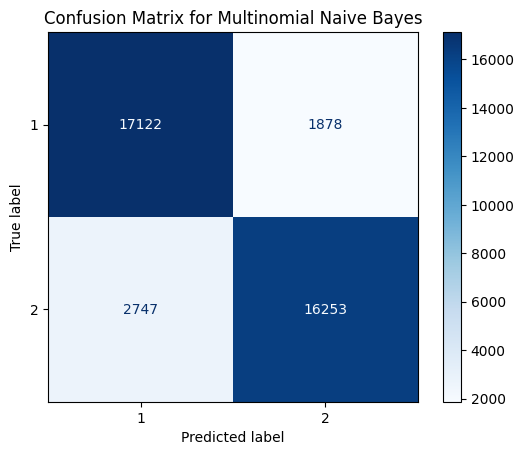

<Figure size 800x600 with 0 Axes>

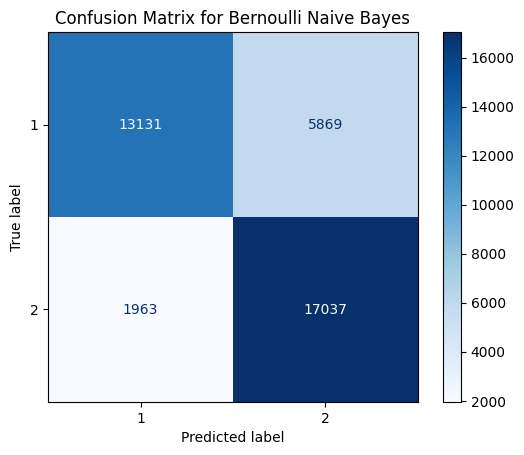

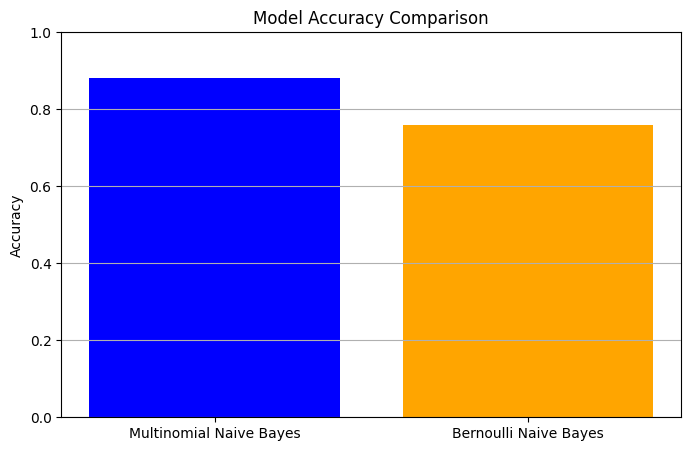

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Assuming CNB, MNB, BNB are your trained classifiers
# and X_test, y_test are your test data and labels
k = [mnb_model, bnb_model]  # List of classifiers
model_names = ['Multinomial Naive Bayes', 'Bernoulli Naive Bayes']
accuracies = [0.88, 0.76]  # Example accuracies for each model

# Plotting confusion matrices
for model, name in zip(k, model_names):
    plt.figure(figsize=(8, 6))

    y_pred = model.predict(X_test_vectorized)  # Assuming X_test_vectorized is your vectorized test data

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Use ConfusionMatrixDisplay to plot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)  # You can customize the colormap if needed


    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# Create a bar plot for accuracies
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.grid(axis='y')

# Display the plot
plt.show()